# Linear Quadratic Regulator
## LQR Problem
**System**: 

define a discrete-time system:

\begin{align}
    x_{t+1} &= Ax_{t} + Bu_t \\
    x_0 &= x(0)
\end{align}

**Problem**:

choose $u_0, u_1, ...$ so that 

- $x_0, x_1, ...$ is small, i.e., we get good regulation or control
- $u_0, u_1, ...$ is small, i.e., using small input effort or actuator authority

There are usually competing objectives, e.g., a large $u$ can drive $x$ to zero fast.

LQR is used to solve the above problem, trying to find good balance between good regulation, small input effect and control errors.

**LQR Formulation**:

We define a quadratic cost function as:

\begin{equation}
        J(U) = \sum_{t=0}^{N-1}(x_t^TQx_t + u_t^TRu_t) + x_N^TQ_fx_N
\end{equation}

where $U = (u_0, u_1, ..., u_{N-1})$ and 

\begin{align}
        Q &= Q^T \ge 0 \\ 
        Q_f &= Q_f^T \ge 0 \\
        R &= R^T \ge 0
\end{align}

**LQR Problem**: find $u_0^{lqr}, u_1^{lqr}, u_{N-1}^{lqr}$ that minimizes $J(U)$.


## LQR via Least-squares

LQR can be reformulated and solved as a least-squares problem.

Assuming $X = (x_0, ..., x_N)$ is a linear function of $x_0$, and $U = (u_0, ..., u_{N-1})$:

\begin{equation}
    \begin{bmatrix}
        x_0 \\
        \vdots \\
        x_N
    \end{bmatrix}
    = 
    \begin{bmatrix}
        0 & \dots &  & \\
        B & 0 & \dots & \\
        AB & B & 0 & \dots \\
        \vdots & \vdots & & \\
        A^{N-1}B & A^{N-2}B & \dots & B
    \end{bmatrix}
    \begin{bmatrix}
        u_0 \\
        \vdots \\
        u_{N-1}
    \end{bmatrix}
    + 
    \begin{bmatrix}
    I \\
    A \\
    \vdots \\
    A^N
    \end{bmatrix} 
    x_0
\end{equation}

For brevity, we have dynamics as:

\begin{equation}
    X = GU+Hx_0
\end{equation}



For LQR cost, we then have:

\begin{equation}
    J(U) = X^T
    \begin{bmatrix}
    Q & & & \\
      & Q &  & \\
      & & \vdots &  \\
      & & & Q_f  
    \end{bmatrix}
    X + 
    U^T 
    \begin{bmatrix}
    R & & & \\
      & R & & \\
      &  & \vdots & \\
      &  &  & R 
    \end{bmatrix}
    U
\end{equation}


## Naive Method Solution

A naive method such as QR factorization can be directly applied to solve the above least-square problem.

## Dynamci Programming Solution

### Value Function

for $t = 0, ..., N$ define the value function $V_t$ by:

\begin{equation}
    V_t(z) = \min_{u_t, ..., u_{N-1}} \sum_{\tau = t}^{N-1}(x_{\tau}^TQx_{\tau} + u_{\tau}^TRu_{\tau}) + x_N^TQ_fx_N
\end{equation}

subject to 

\begin{align}
    x_t &= z \\
    x_{\tau+1} &= Ax_{\tau} + Bu_{\tau} \\
    \tau &= t, ..., T
\end{align}

- $V_t(z)$ gives the minimum LQR cost-to-go, starting from state $z$ at time $t$
- $V_0(x_0)$ is min LQR cost (from state $x_0$ at time 0)
- $V_t$ is quadratic, i.e., $V_t(z) = z^TP_tz$, where $P_t = P_t^T \ge 0$
- $P_t$ cam be found recusively, working backwrad from $t = N$
- the LQR optimal $u$ is easily expressed in terms of $P_t$
- cost-to-go with no time left is the final state cost: $V_N(z) = z^TQ_fz$

### Dynamic Programming Principle

Now suppose we know $V_{t+1}(z)$, what is the optimal choice for $u_t$? Choices of $u_t$ affect:
- current cost incurred through $u_t^TRu_t$
- where we land, $x_{t+1}$, which affects the min-cost-to-go from $x_{t+1}$

Recall that we can minimize in any order:

\begin{equation}
    \min_{w_1, ..., w_k} f(w_1, ..., w_k) = \min_{w_1}(\min_{w_2,..., w_k} f(w_1. w_2, ..., w_k))
\end{equation}

\begin{align}
    V_t(x_t) &= \min_{u_t, ..., u_{N-1}} \sum_{\tau = t}^{N-1}(x_{\tau}^TQx_{\tau} + u_{\tau}^TRu_{\tau}) + x_N^TQ_fx_N \\
            &= \min_{u_t, ..., u_{N-1}} x_t^TQx_t + u_t^TRu_t + \sum_{\tau = t+1}^{N-1}(x_{\tau}^TQx_{\tau} + u_{\tau}^TRu_{\tau}) + x_N^TQ_fx_N \\
            &= \min_{u_t} \{x_t^TQx_t + u_t^TRu_t + \min_{u_{t+1}, u_{N-1}}\sum_{\tau = t+1}^{N-1}(x_{\tau}^TQx_{\tau} + u_{\tau}^TRu_{\tau}) + x_N^TQ_fx_N\} \\
            &= \min_{u_t} (x_t^TQx_t + u_t^TRu_t + V_{t+1}(x_{t+1})) \\
            &= x_t^TQx_t + \min_{u_t} (u_t^TRu_t + V_{t+1}(x_{t+1})) \\
\end{align}

**In words**:
- minimum cost-to-go from where you are = minimum over (current cost incurred + minimum cost-to-go from where you land)


**Recursion**
- assume $V_{t+1}(x_{t+1}) = x_{t+1}^TP_{t+1}x_{t+1}$. with P_{t+1} is symmetric and positive semidefinite.
- by DP, we can have

  \begin{align}
    V_t(x_t) &= x_t^TQx_t + \min_{u_t} (u_t^TRu_t + x_{t+1}^TP_{t+1}x_{t+1}) \\
            &= x_t^TQx_t + \min_{u_t} (u_t^TRu_t + (Ax_t+Bu_t)^TP_{t+1}(Ax_t + Bu_t))
  \end{align}

- solve using KKT condition, i.e., derivative w.r.t. $u_t$ is 0:
  
  \begin{equation}
    2u_t^TR + 2(Ax_t + Bu_t)^tP_{t+1}B = 0
  \end{equation}

- optimal control input is then:
  
  \begin{align}
    u_t^* &= -(R+B^TP_{t+1}B)^{-1}B^TP_{t+1}Ax_t \\
          &= K_tx_t
  \end{align}
  
- and 

\begin{align}
  V_t(x_t) &= x_t^TQx_t + u_t^(*T)Ru_t^* + (Ax_t + Bu_t^*)^TP_{t+1}(Ax_t + Bu_t^*) \\
          &= x_t^T(A+A^TP_{t+1}A -A^TP_{t+1}B(R+B^TP_{t+1}B)^{-1}B^TP_{t+1}A)x_t \\
          &= x_t^TP_tx_t
\end{align}

- easy to show $P_t=P_t^T \ge 0$


**Procedure**

- set $P_N:=Q_f$
- for t = N, ..., 1
  - calculate $P_{t-1}$ based on $P_t$
  - this is recusion, running backward in time
- for t = 0, ..., N-1
  - calculate $K_t$
  - calculate optimal control $u_t = K_tx_t$. Optimal $u_t$ is a linear function of the state, called linear state feedback.



## JAX Implementation

The following equations describes a 2-state, single-input, single output system,

\begin{align}
    x_{t+1} &= 
    \begin{bmatrix}
      1 & 1 \\
      0 & 1
    \end{bmatrix}
    x_t + 
    \begin{bmatrix}
    0 \\
    1
    \end{bmatrix}
    u_t \\
    y_t &= 
    \begin{bmatrix}
    1 & 0
    \end{bmatrix}
    x_t
\end{align}

with initial state $x_0 = (1, 0)$, horizon $N = 20$, and weight matrices $Q = Q_f = C^TC, R = \rho I$.

### Dynamic Programming
Based on dynamic programming, analytical solutions can be represented as previously discussed. 


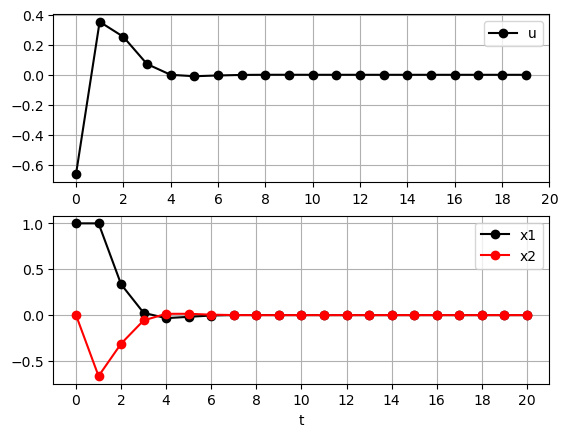

In [23]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

A = jnp.array([[1, 1], [0, 1]])
B = jnp.array([[0], [1]])
C = jnp.array([[1, 0]])

Q = C.T@C
Qf = Q
rho = 0.3
R = rho*jnp.array([[1]])

x0 = jnp.array([[1], [0]])


def lqr_dp(A, B, Q, R, Qf, x0, N):
    
    # initialize P = Qf
    P = []
    K = []
    x = []
    u = []
    cost = 0

    # backward pass for P
    P.insert(0, Qf)
    for _ in range(N):
        Pnext = Q + A.T @ P[0] @ A - A.T @ P[0] @ B @ jnp.linalg.inv(R + B.T @ P[0] @ B) @ B.T @ P[0] @ A
        P.insert(0, Pnext)
    
    # forward pass for K
    for t in range(N):
        K.append(-jnp.linalg.inv(R + B.T @ P[t] @ B) @ B.T @ P[t] @ A)

    # forward pass for x and total cost
    x.append(x0)
    for t in range(N):
        u.append(K[t] @ x[t])
        cost += x[t].T @ Q @ x[t] + u[t].T @ R @ u[t]
        x.append(A @ x[t] + B @ u[t])
    cost += x[N].T @ Qf @ x[N]

    return cost, x, u, K, P

N = 20
cost, x, u, K, P = lqr_dp(A, B, Q, R, Qf, x0, N)

plt.figure()
plt.subplot(2,1,1)
plt.plot(jnp.array(u)[:,0,0], 'k-o', label='u')
plt.xticks(range(0, N+1, 2))
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(jnp.array(x)[:,0,0], 'k-o', label='x1')
plt.plot(jnp.array(x)[:,1,0], 'r-o', label='x2')
plt.xticks(range(0, N+1, 2))
plt.xlabel("t")
plt.grid()
plt.legend()

### Differentiable Dynamic Programming
This section is to solve the Bellman equation using differentiable dynamic programming.
Refer to [Differentiable Optimal Control via Differential Dynamic Programming](https://arxiv.org/pdf/2209.01117.pdf)